# **i. Introduction**

* Nama      : Sihar Pangaribuan
* Batch     : HCK-005
* Dataset   : [credit_card_default](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=ml_datasets&t=credit_card_default&page=table&project=authentic-reach-362615&ws=!1m5!1m4!4m3!1sbigquery-public-data!2sml_datasets!3scredit_card_default) 
* Objectiv  : Membuat model classification untuk memprediksi default_payment_next_month 

Descripsi kolom 
- LIMIT_BAL : Amount of given credit in NT dollars (includes individual and family/supplementary credit 
- SEX: Gender (1 = male, 2 = female)
- EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)
- MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = divorce)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

# **ii. Query SQL**

In [2]:
# SELECT limit_balance,
#     CAST(sex AS INT) AS sex,
#     CAST(education_level AS INT) AS education_level,
#     CAST(marital_status AS INT) AS marital_status,
#     age, pay_0, pay_2 ,pay_3, pay_4,
#     CAST(pay_5 AS float64) AS pay_5,
#     CAST(pay_6 AS float64) AS pay_6,
#     bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5 ,bill_amt_6, pay_amt_1,
#     pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6,
#     CAST(default_payment_next_month AS INT) AS default_payment_next_month
# FROM `bigquery-public-data.ml_datasets.credit_card_default` 
# limit 9980


In [3]:
!pip install scikit-learn-intelex

# **iii. Import Libraries**

In [4]:
# Import library to used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearnex import patch_sklearn
import pickle, joblib
import json

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [5]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


# **iv. Data Loading**

In [6]:
df = pd.read_csv('h8dsft_P1M1_sihar_pangaribuan.csv')

In [7]:
# Menampilkan 10 data teratas
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0
5,300000,2,4,2,32,0,0,0,0,0,...,65150,-450,700,15235,1491,1303,0,2000,1400,0
6,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
7,200000,1,1,1,58,0,0,0,0,0,...,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
8,500000,1,1,1,39,0,0,0,0,0,...,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
9,230000,1,1,1,48,0,0,0,0,0,...,105508,108101,110094,7000,6607,3773,4290,4164,2000,0


In [8]:
# Menampilkan 10 data terbawah
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000,2,2,2,26,-1,-1,-1,-1,-2,...,0,0,0,463,2500,0,0,0,0,0
2956,100000,1,3,1,40,0,0,-1,-1,-2,...,0,0,0,2000,2377,40000,0,0,0,0
2957,30000,2,3,1,48,1,-1,-1,-2,-2,...,0,0,0,200,0,0,0,0,0,0
2958,80000,2,3,1,39,-1,-1,-1,-1,-2,...,0,0,5000,5000,5000,0,5000,5000,470,0
2959,20000,1,3,2,26,-1,-1,-1,-2,-2,...,0,0,0,1560,0,0,0,0,0,0
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,2800,0,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,0,0,0,300,5880,0,0,0,0,1
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,780,390,390,390,390,1
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,0,390,390,390,390,0,780,0
2964,290000,2,2,1,39,1,-2,-2,-2,-2,...,3184,390,390,10000,800,3184,390,390,6617,0


In [9]:
# Melakukan pengecekan ukuran data
df.shape

(2965, 24)

Dari hasil jumlah data adalah 2965 baris dan 24 kolom

In [10]:
# Cek data yang duplicated
df[df.duplicated()]

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2815,200000,2,1,1,34,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


Didapat 1 baris yang duplicat maka akan di hapus 

In [11]:
# Menghapus data yang duplicate
df.drop_duplicates(inplace=True)

Dari informasi tidak ada ditemukan data yang missing karena jumlah datanya sama semua, dan semua kolo bertype integer

In [12]:
# Cek data missing
df.isna().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

# **v. Exploratory Data Analysis (EDA)**

In [13]:
# Untuk EDA kita menggunakan data copy 
df_eda = df.copy()
df_eda.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000,1,6,1,54,0,0,0,0,0,...,29296,26210,17643,2545,2208,1336,2232,542,348,1
1,200000,1,4,1,49,0,0,0,0,0,...,50146,50235,48984,1689,2164,2500,3480,2500,3000,0
2,20000,2,6,2,22,0,0,0,0,0,...,1434,500,0,4641,1019,900,0,1500,0,1
3,260000,2,4,2,33,0,0,0,0,0,...,27821,30767,29890,5000,5000,1137,5000,1085,5000,0
4,150000,1,4,2,32,0,0,0,-1,0,...,150464,143375,146411,4019,146896,157436,4600,4709,5600,0


In [14]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2964 non-null   int64
 1   sex                         2964 non-null   int64
 2   education_level             2964 non-null   int64
 3   marital_status              2964 non-null   int64
 4   age                         2964 non-null   int64
 5   pay_0                       2964 non-null   int64
 6   pay_2                       2964 non-null   int64
 7   pay_3                       2964 non-null   int64
 8   pay_4                       2964 non-null   int64
 9   pay_5                       2964 non-null   int64
 10  pay_6                       2964 non-null   int64
 11  bill_amt_1                  2964 non-null   int64
 12  bill_amt_2                  2964 non-null   int64
 13  bill_amt_3                  2964 non-null   int64
 14  bill_amt_4   

In [15]:
df_eda.columns

Index(['limit_balance', 'sex', 'education_level', 'marital_status', 'age',
       'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt_1',
       'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6',
       'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5',
       'pay_amt_6', 'default_payment_next_month'],
      dtype='object')


Kolom sex, education_level, marital_status, default_payment_next_month berdasarkan deskripsi dari data harusnya merupakan type data kategori jadi harus diubah

In [16]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2964 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2964 non-null   int64
 1   sex                         2964 non-null   int64
 2   education_level             2964 non-null   int64
 3   marital_status              2964 non-null   int64
 4   age                         2964 non-null   int64
 5   pay_0                       2964 non-null   int64
 6   pay_2                       2964 non-null   int64
 7   pay_3                       2964 non-null   int64
 8   pay_4                       2964 non-null   int64
 9   pay_5                       2964 non-null   int64
 10  pay_6                       2964 non-null   int64
 11  bill_amt_1                  2964 non-null   int64
 12  bill_amt_2                  2964 non-null   int64
 13  bill_amt_3                  2964 non-null   int64
 14  bill_amt_4   

In [17]:
# Mengubah type data kolom hour dan month menjadi object 
df_eda[['sex', 'education_level', 'marital_status', 'default_payment_next_month']]  = df_eda[['sex', 'education_level', 'marital_status', 'default_payment_next_month']].astype('object')

In [18]:
# untuk mempermudah analisa dipisahkan antara kolom numerik dan kolom kategori
df_eda_num = df_eda.select_dtypes(include=np.number).columns.tolist()
df_eda_cat = df_eda.select_dtypes(include=['object']).columns.tolist()
df_eda_cat

['sex', 'education_level', 'marital_status', 'default_payment_next_month']

In [19]:
df_eda[df_eda_cat].describe()

,sex,education_level,marital_status,default_payment_next_month
count,2964,2964,2964,2964
unique,2,7,4,2
top,2,2,2,0
freq,1801,1400,1594,2329


In [20]:
# Melihat jumlah unik pada setiap kolom kategori
for i in df_eda_cat:
    print(i)
    print()
    print(df_eda[i].value_counts())
    print('-' * 45)

sex

sex
2    1801
1    1163
Name: count, dtype: int64
---------------------------------------------
education_level

education_level
2    1400
1    1038
3     483
5      24
4      13
6       4
0       2
Name: count, dtype: int64
---------------------------------------------
marital_status

marital_status
2    1594
1    1331
3      35
0       4
Name: count, dtype: int64
---------------------------------------------
default_payment_next_month

default_payment_next_month
0    2329
1     635
Name: count, dtype: int64
---------------------------------------------


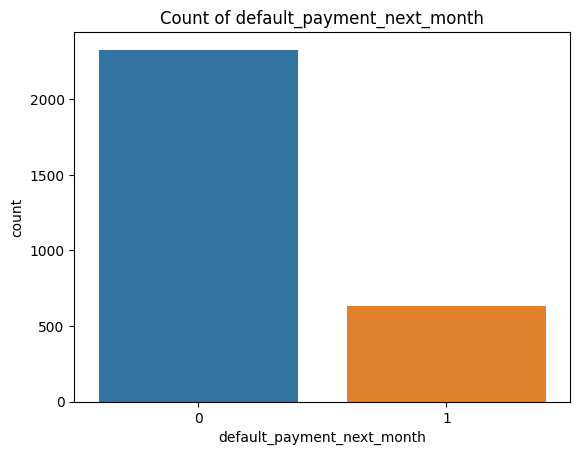

In [21]:
# visalisasi Jumlah default_payment_next_month

sns.countplot(x = 'default_payment_next_month', data = df_eda)
plt.title('Count of default_payment_next_month')

plt.show()

Text(0.5, 1.0, 'Percentages Default_Payment')

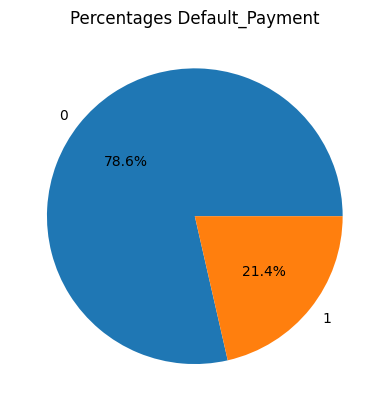

In [24]:
# visalisasi Jumlah default_payment_next_month
plt.pie(df_eda['default_payment_next_month'].value_counts(),labels = list(df_eda['default_payment_next_month'].value_counts().index),autopct = '%1.1f%%')
plt.title('Percentages Default_Payment')

Dari hasil ditemukan kalau data imbalacene pada default_payment_next_month, 0 = no, 1 = yes, sebanyak 78.6% orang lanjut bayar dan 21.4% gagal bayar

<Axes: xlabel='sex', ylabel='count'>

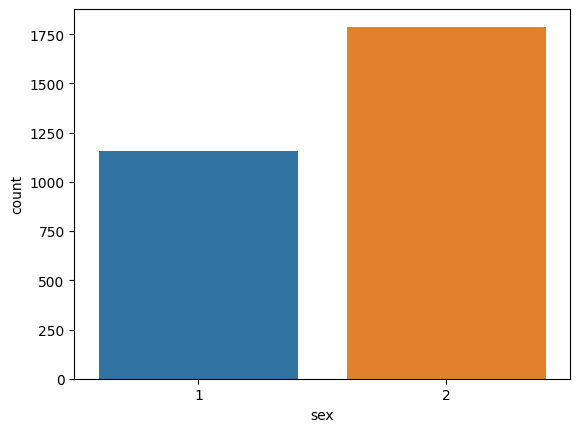

In [ ]:
# Visualisai kolom sex
sns.countplot(x = 'sex', data = df_eda)

Dari hasil dapat dilihat kalau yang lebih banyak mempunyai kartu kredit adalah perempuan 

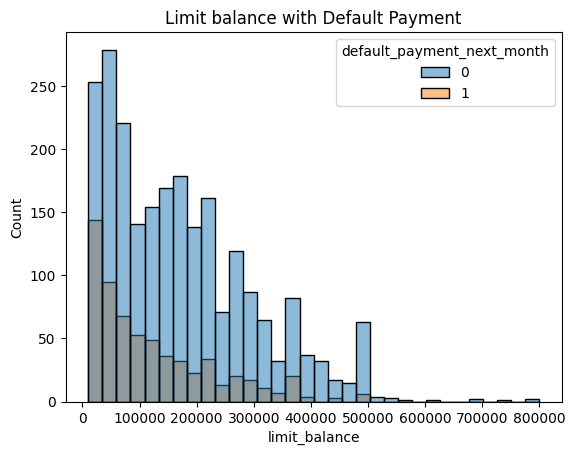

In [25]:
# Plot limit balance dengan default payment 
sns.histplot(x = 'limit_balance', hue = 'default_payment_next_month', data = df_eda)
plt.title('Limit balance with Default Payment')
plt.show()

Dari hasil plot didapat distribusi yang tidak normal,  dapat lihat bahwa jumlah limit balance dapat mempengaruhi default payment, jumlah limit balance  yang lebih kecil menyebabkan lebih banyak gagal bayar

Text(0.5, 1.0, 'Age with Default Payment')

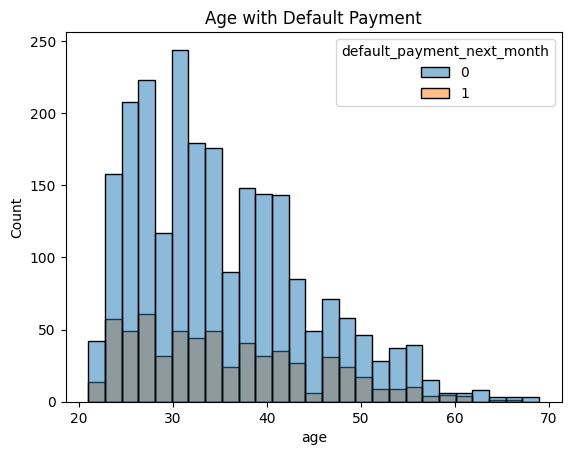

In [26]:
# Plot age dengan default payment 
sns.histplot(x = 'age', hue = 'default_payment_next_month', data = df_eda)
plt.title('Age with Default Payment')

Dari hasil visualisasi dapat dianalisa, bahwa umur pelanggan yang lebih banyak menggunakan kartu kredit di rentan umur 25 sampai 35 tahun

In [ ]:
df_eda.describe()

,limit_balance,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2.944000e+03,2944.000000,2944.000000,2944.000000,2944.000000
mean,163417.119565,35.176630,0.002717,-0.122962,-0.144022,-0.186141,-0.227242,-0.256454,52024.535666,50579.692255,48184.891644,44036.317255,40897.538383,39730.313519,6355.841033,6.289003e+03,5156.410666,4555.989810,4924.326427,5394.925272
std,125052.247018,9.106202,1.114568,1.181389,1.183321,1.178006,1.158663,1.166904,72275.090159,70766.986420,68112.264082,61832.839163,58177.259178,57195.695663,20949.208549,2.897895e+04,14328.737191,13314.417137,16789.855656,17330.721834
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-11545.000000,-67526.000000,-25443.000000,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3954.750000,3388.750000,3311.750000,2579.750000,1943.500000,1387.500000,1009.750000,1.000000e+03,476.750000,312.750000,325.250000,165.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24168.500000,23048.000000,21500.500000,19861.000000,18771.500000,18487.500000,2229.000000,2.191000e+03,1987.000000,1600.000000,1632.500000,1612.500000
75%,230000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69556.750000,67866.750000,63034.500000,58689.750000,53414.500000,52297.000000,5075.750000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.750000
max,800000.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,613860.000000,512650.000000,578971.000000,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000


Dari hasil ditemukan bahwa umur paling muda yang punya kartu kredit adalah 21 tahun dan paling tua 69 tahun

In [ ]:
# Fungsi melihat distribusi dan outliers
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

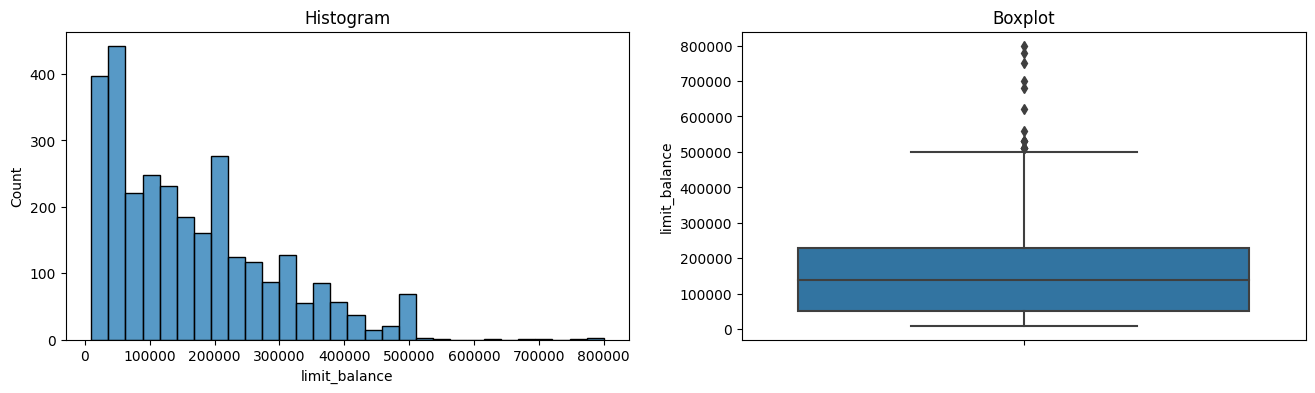


Skewness Value: 1.0006047564306488



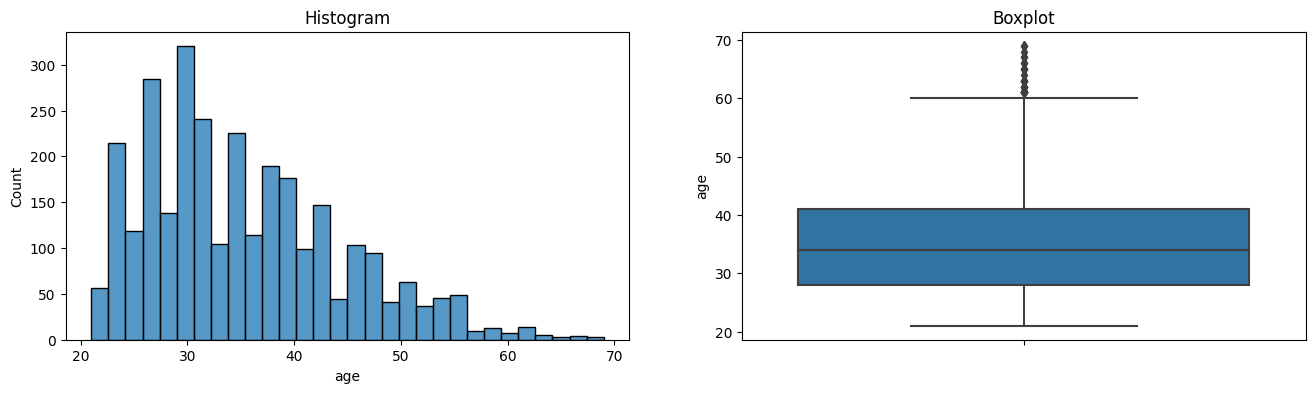


Skewness Value: 0.7726317877077615



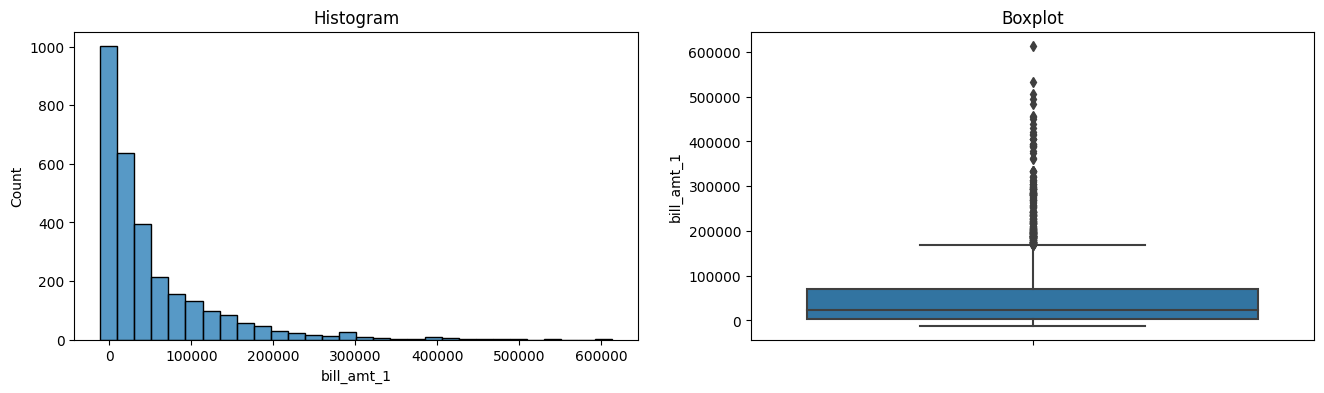


Skewness Value: 2.4842290445797968



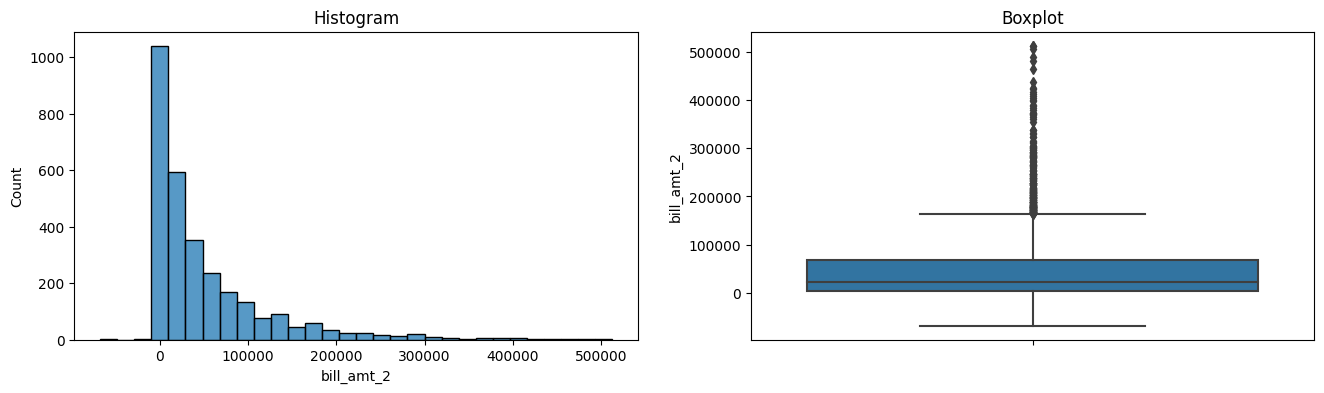


Skewness Value: 2.4579711014121437



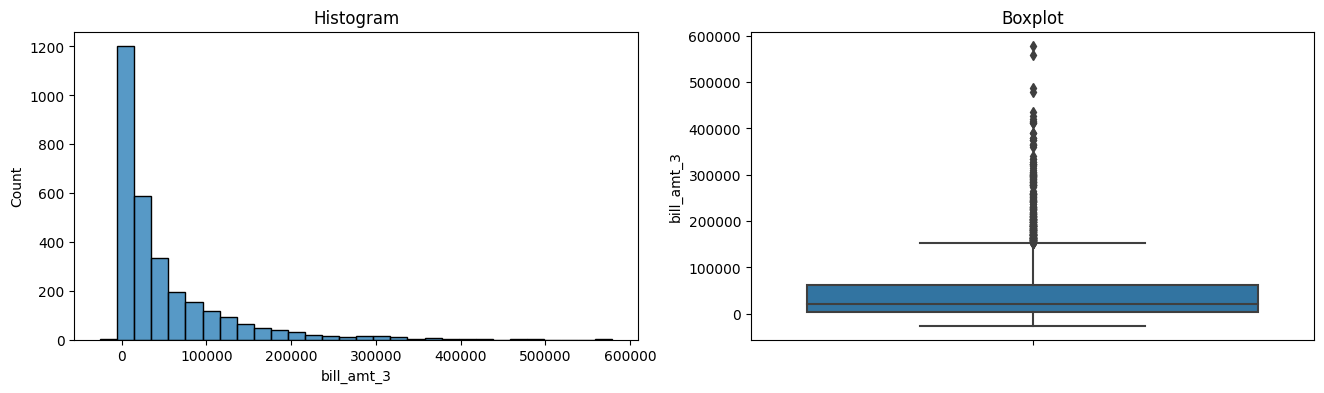


Skewness Value: 2.569558864308388



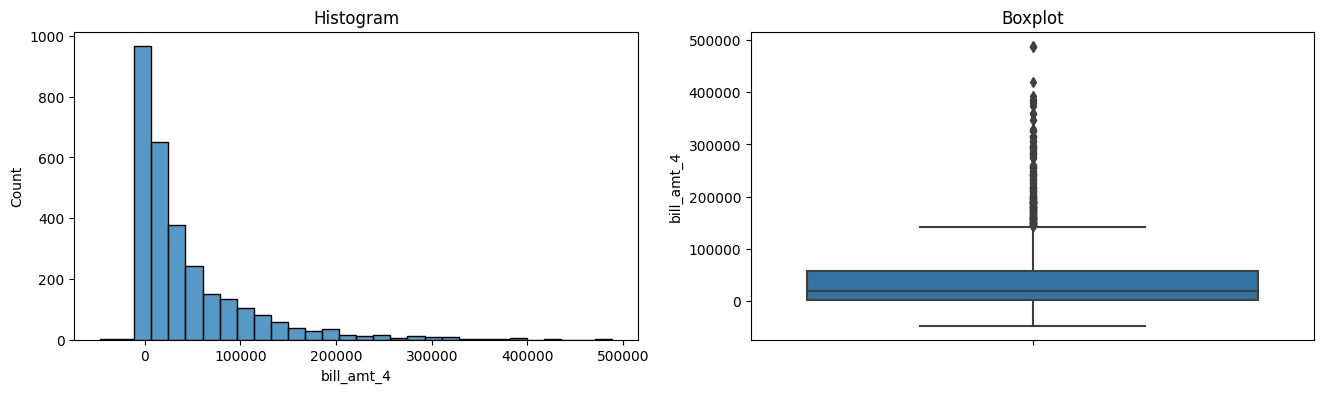


Skewness Value: 2.447791627637353



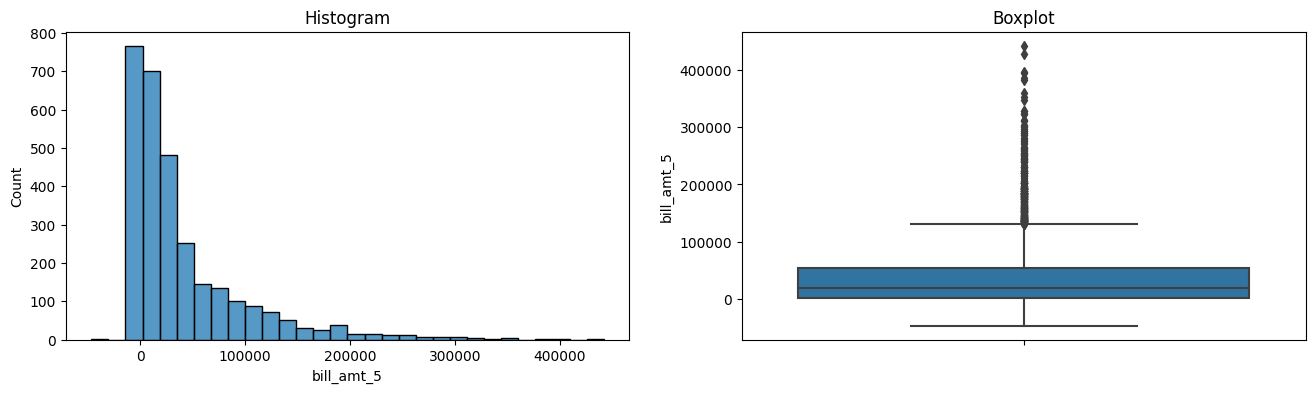


Skewness Value: 2.399943857538142



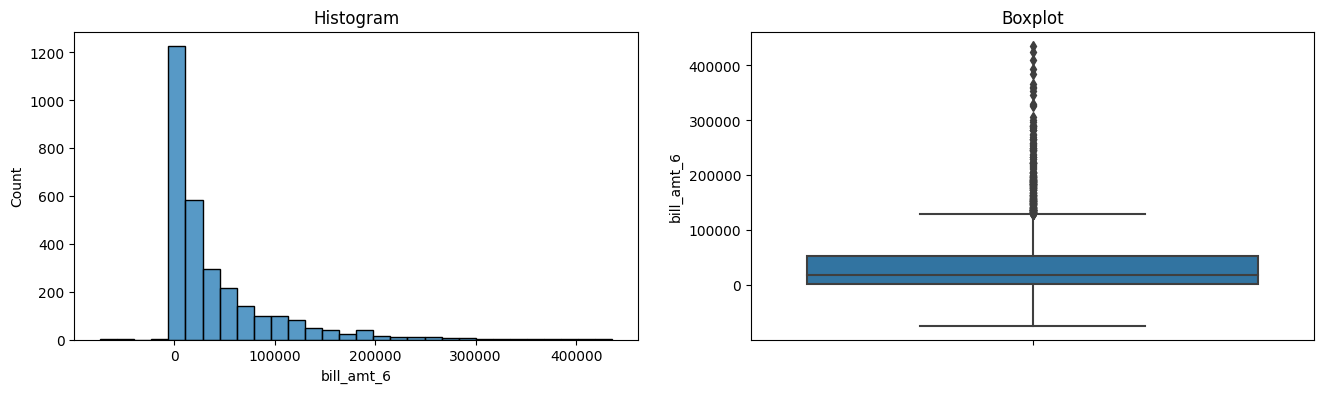


Skewness Value: 2.4319995109017865



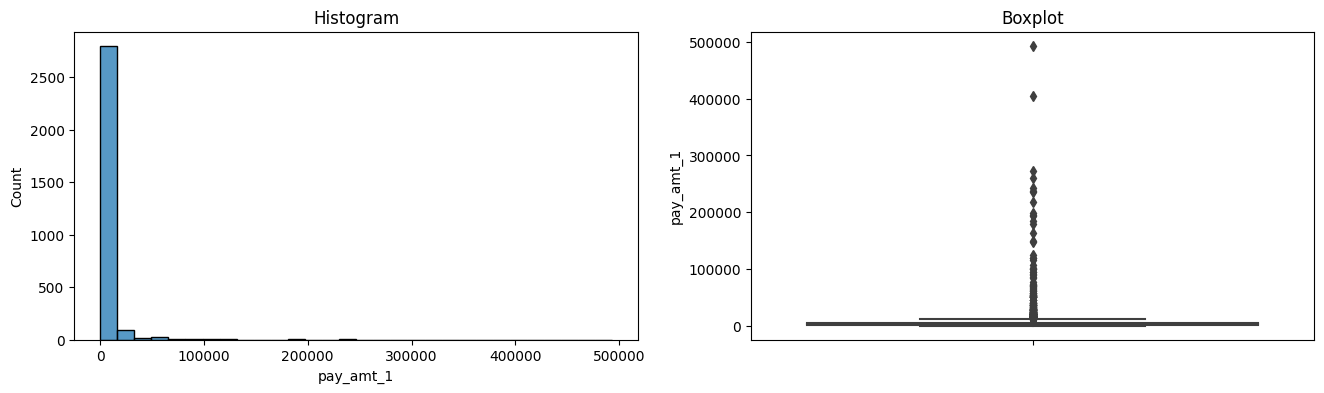


Skewness Value: 11.87590259977231



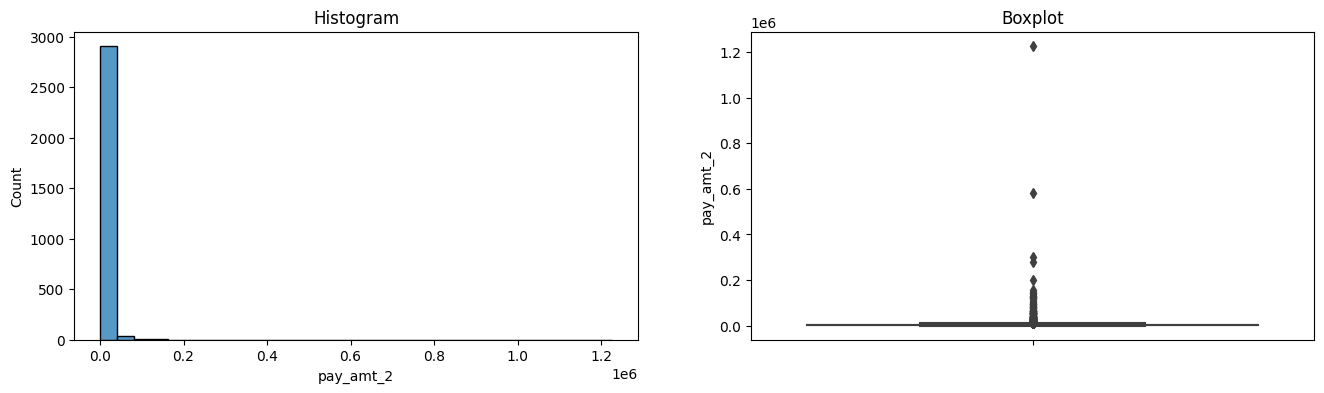


Skewness Value: 29.39979237780383



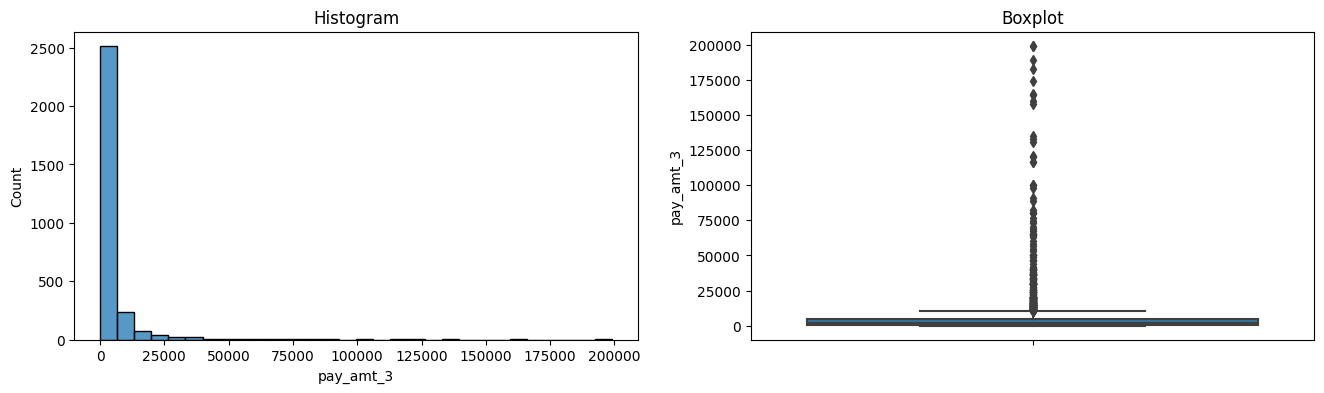


Skewness Value: 8.043463398022954



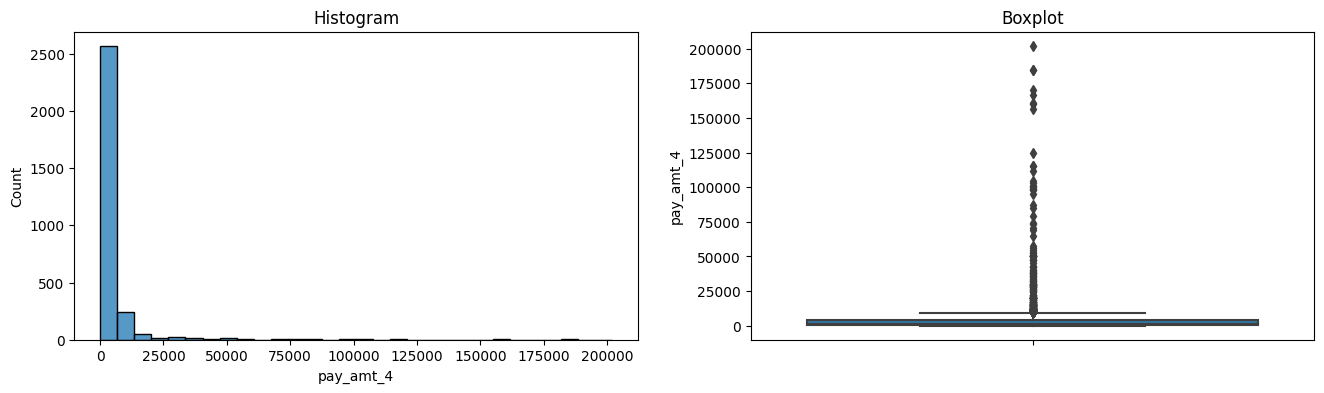


Skewness Value: 8.450287705274073



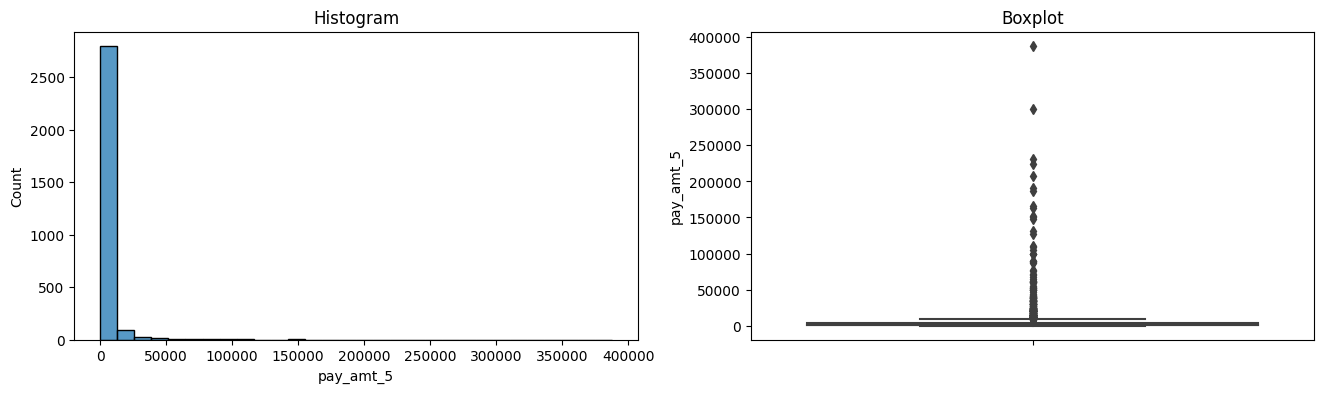


Skewness Value: 11.467169258420292



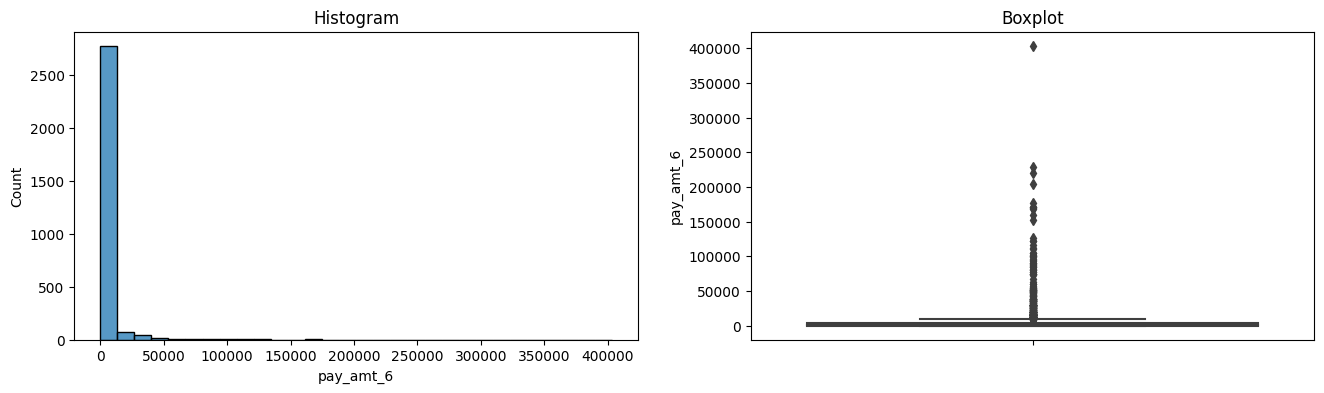


Skewness Value: 9.758714356332968



In [ ]:
# Melihat Distribusi pada kolom numerik
for col in df_eda_num:
    diagnostic_plots(df_eda[df_eda_num], col)
    print('\nSkewness Value:', df_eda[df_eda_num][col].skew())
    print()

Dari hasil, didapat semua kolom distribusinya tiak ada yag normal, nanti akan di handling di feature enginering

In [ ]:
# Mencari korelasi antar kolom 
df.corr()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
limit_balance,1.000000,0.028484,-0.220814,-0.117827,0.130820,-0.223618,-0.281024,-0.275689,-0.245488,-0.236047,...,0.309019,0.309446,0.306594,0.171937,0.169386,0.242948,0.210343,0.200667,0.224998,-0.161868
sex,0.028484,1.000000,-0.016525,-0.011455,-0.127337,-0.078449,-0.104584,-0.098121,-0.071938,-0.053272,...,-0.033498,-0.031820,-0.035451,0.019396,0.014360,0.019533,-0.001542,-0.019886,-0.002395,-0.021626
education_level,-0.220814,-0.016525,1.000000,-0.135996,0.197181,0.089550,0.098758,0.104912,0.100830,0.095823,...,-0.018106,-0.024405,-0.022204,-0.030559,-0.027769,-0.036072,-0.013626,-0.037912,-0.040681,0.044745
marital_status,-0.117827,-0.011455,-0.135996,1.000000,-0.400743,0.000092,0.046625,0.037188,0.042975,0.046840,...,-0.029223,-0.028675,-0.015995,-0.017469,-0.006476,-0.020092,-0.017604,-0.000396,-0.008138,-0.026193
age,0.130820,-0.127337,0.197181,-0.400743,1.000000,-0.009031,-0.061099,-0.048898,-0.061633,-0.069851,...,0.050310,0.061396,0.057874,0.016974,0.009619,0.027705,0.058540,0.013390,0.010286,0.016883
pay_0,-0.223618,-0.078449,0.089550,0.000092,-0.009031,1.000000,0.669495,0.561228,0.520459,0.493996,...,0.187573,0.185308,0.185900,-0.093044,-0.085928,-0.105573,-0.071469,-0.048274,-0.059778,0.357185
pay_2,-0.281024,-0.104584,0.098758,0.046625,-0.061099,0.669495,1.000000,0.765418,0.642970,0.605203,...,0.231828,0.228485,0.228834,-0.098950,-0.066372,-0.076014,-0.046701,-0.026367,-0.050984,0.288669
pay_3,-0.275689,-0.098121,0.104912,0.037188,-0.048898,0.561228,0.765418,1.000000,0.750236,0.676399,...,0.236184,0.235797,0.228648,-0.004540,-0.066569,-0.073318,-0.033517,-0.046429,-0.066386,0.275608
pay_4,-0.245488,-0.071938,0.100830,0.042975,-0.061633,0.520459,0.642970,0.750236,1.000000,0.823085,...,0.249275,0.252290,0.249601,-0.020869,-0.011448,-0.081133,-0.027966,-0.039901,-0.059596,0.255648
pay_5,-0.236047,-0.053272,0.095823,0.046840,-0.069851,0.493996,0.605203,0.676399,0.823085,1.000000,...,0.263235,0.266823,0.256782,-0.014755,-0.000139,0.002359,-0.060229,-0.045492,-0.042553,0.253161


<Axes: >

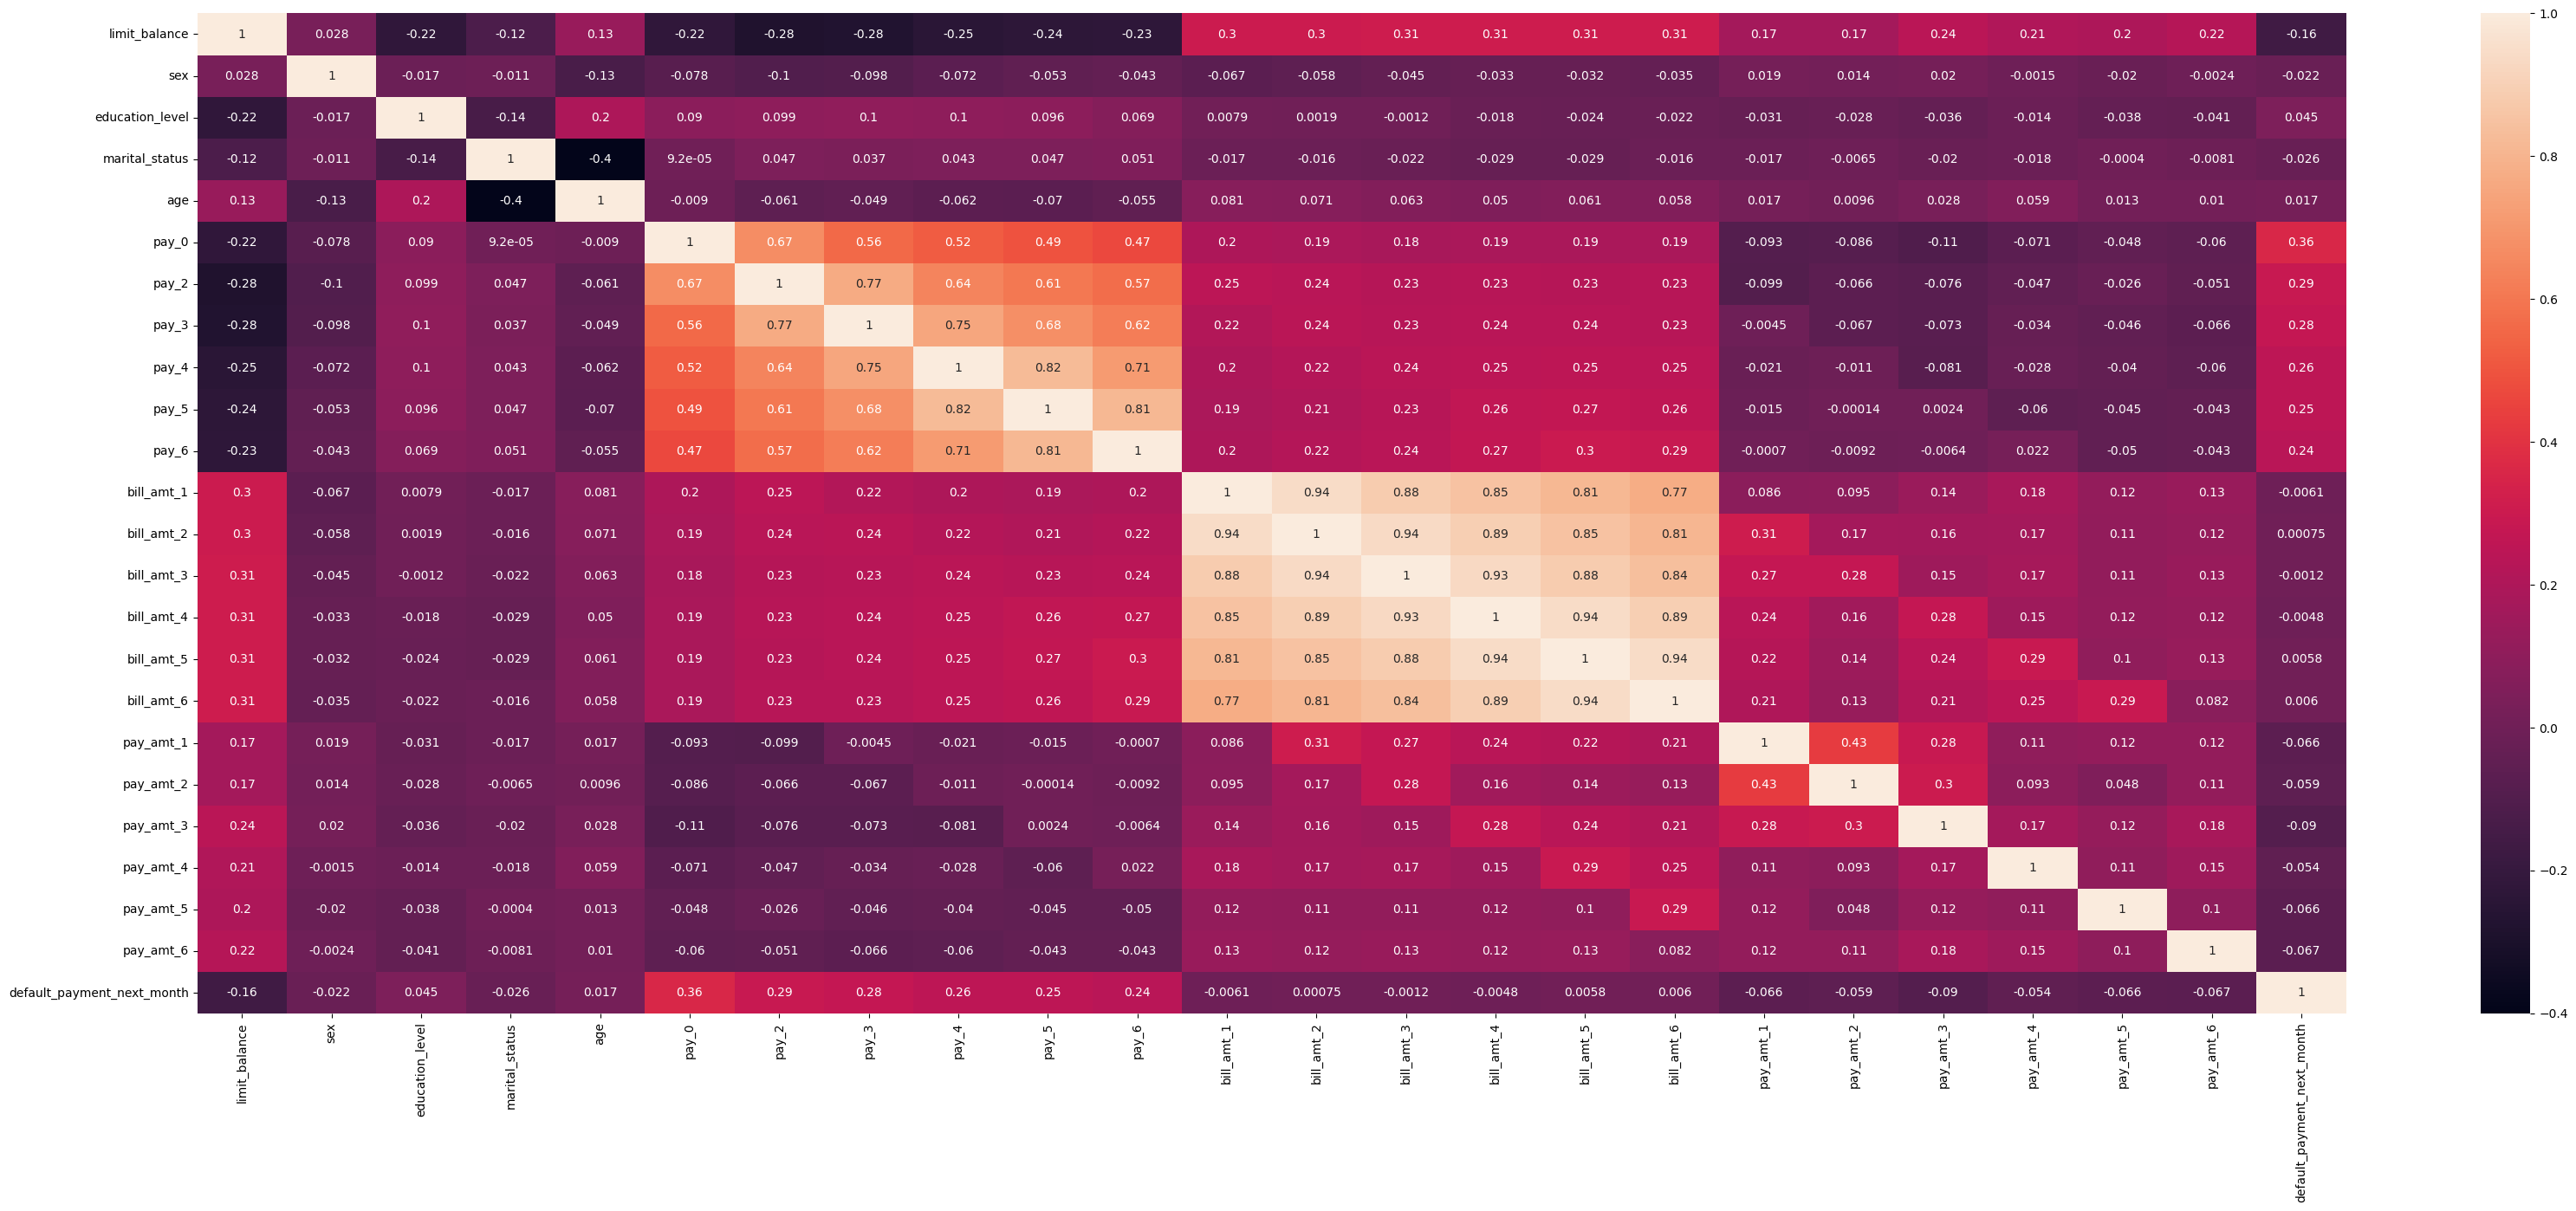

In [ ]:
# Visualisasi corelasi
plt.figure(figsize=(40,15))
sns.heatmap(df.corr(), annot = True)

Dari hasil korelasi kita memilih kolom" yang nilai korrelasinya diatas 0,01, yaitu kolom 
'limit_balance', 'sex', 'education_level', 'marital_status', 'age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', 'default_payment_next_month'. Kolom - ini nantinya yang akan di dipakai masuk ke model 

In [ ]:

# Nenyimpan data untuk inference 
inference = df.sample(20, random_state = 33)
inference.to_csv('imference.csv', index=False)

# removing the sample data from the main data

df = df.drop(inference.index)

# **vi. Feature Engineering**

In [ ]:
# Split data antara fitur dan target
X = df.drop(['default_payment_next_month'], axis=1)
y = df['default_payment_next_month']
X

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,80000,1,6,1,54,0,0,0,0,0,...,62290,29296,26210,17643,2545,2208,1336,2232,542,348
1,200000,1,4,1,49,0,0,0,0,0,...,50942,50146,50235,48984,1689,2164,2500,3480,2500,3000
2,20000,2,6,2,22,0,0,0,0,0,...,15535,1434,500,0,4641,1019,900,0,1500,0
3,260000,2,4,2,33,0,0,0,0,0,...,27086,27821,30767,29890,5000,5000,1137,5000,1085,5000
4,150000,1,4,2,32,0,0,0,-1,0,...,161192,150464,143375,146411,4019,146896,157436,4600,4709,5600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000,2,3,2,28,-1,-1,-1,-2,-2,...,0,0,0,0,2800,0,0,0,0,0
2961,50000,2,3,1,51,-1,-1,-1,-1,-2,...,5880,0,0,0,300,5880,0,0,0,0
2962,450000,2,2,1,38,-2,-2,-2,-2,-2,...,390,390,390,390,390,780,390,390,390,390
2963,50000,2,2,1,44,-2,-2,-2,-2,-2,...,390,390,390,0,390,390,390,390,0,780


In [ ]:
# Split data antara train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=48)

In [ ]:
# Melihat jumlah data stelah di split

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2355, 23)
(589, 23)
(2355,)
(589,)


In [ ]:
# Pemilihan kolom (fitur yang akan dipakai berdasarkan hasil korelasi diatas 

X_train = X_train[['limit_balance', 'sex', 'education_level', 'marital_status', 'age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].reset_index(drop=True)
X_test = X_test[['limit_balance', 'sex', 'education_level', 'marital_status', 'age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']].reset_index(drop=True)

In [ ]:
# Membuat pipeline data preposesing 
pipe_1 = Pipeline([
    ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=3))
    ])
 

pipe_2 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA())
])

preproses = ColumnTransformer([
    ("pipe_1", pipe_1, ['limit_balance']),
    ("pipe_2", pipe_2, ['limit_balance', 'sex', 'education_level', 'marital_status', 'age','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6','pay_amt_1','pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])])

In [ ]:
# Fit transform dengan pipeline preproses
X_train_new = preproses.fit_transform(X_train)
X_test_new = preproses.transform(X_test)

# **vii. Model Definition**

In [ ]:
# Defenisi model
log_reg = LogisticRegression()
svc = SVC()
dct = DecisionTreeClassifier()
rdf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()
mlpc = MLPClassifier()

# **viii. Model Training**

In [ ]:
# Logistik regresion 
log_reg.fit(X_train_new, y_train)


LogisticRegression()

In [ ]:
# SVC
svc.fit(X_train_new, y_train)

SVC()

In [ ]:
# Decison Treee
dct.fit(X_train_new, y_train)

DecisionTreeClassifier()

In [ ]:
# random Forest
rdf.fit(X_train_new, y_train)

RandomForestClassifier()

In [ ]:
# KNN
knn.fit(X_train_new, y_train)

KNeighborsClassifier()

In [ ]:
# Naive Bayes
nb.fit(X_train_new, y_train)


GaussianNB()

In [ ]:
# Neural Networks (Multi-layer Perceptron):
mlpc.fit(X_train_new, y_train)

MLPClassifier()

# **ix. Model Evaluation**

## Logistic Regresion

In [ ]:
# Predict dengan menggunanakan logistic regresion
y_pred_train_log_reg = log_reg.predict(X_train_new)
y_pred_test_log_reg = log_reg.predict(X_test_new)

Evaluation: Logistik regresion train set 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1851
           1       0.00      0.00      0.00       504

    accuracy                           0.79      2355
   macro avg       0.39      0.50      0.44      2355
weighted avg       0.62      0.79      0.69      2355

############################################################
Evaluation: Logistik regresion test set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       463
           1       0.00      0.00      0.00       126

    accuracy                           0.79       589
   macro avg       0.39      0.50      0.44       589
weighted avg       0.62      0.79      0.69       589

Confusion Matrix      : 


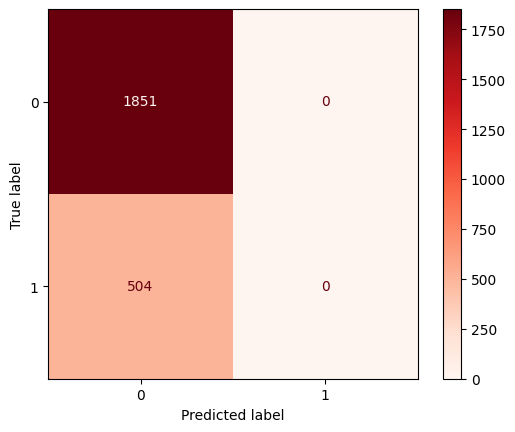

In [ ]:
# Model Evaluasi Logistik Regresion
print('Evaluation: Logistik regresion train set ')
print(classification_report(y_train, y_pred_train_log_reg))
print('#'*60)
print('Evaluation: Logistik regresion test set')
print(classification_report(y_test, y_pred_test_log_reg))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(log_reg, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation Logistik regresion
Recall_score_train_cross_val_log_reg = cross_val_score(log_reg, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_log_reg)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_log_reg.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_log_reg.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_log_reg.mean()-Recall_score_train_cross_val_log_reg.std()) , '-', (Recall_score_train_cross_val_log_reg.mean()+Recall_score_train_cross_val_log_reg.std()))

Recall Score - All - Cross Validation  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall Score - Mean - Cross Validation :  0.0
Recall Score - Std - Cross Validation  :  0.0
Recall Score - Range of Test-Set       :  0.0 - 0.0


In [ ]:
# Membuat repor dan menampungnya didalan dictionary
Report_Recall = {}
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_log_reg.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_log_reg.std()
}
Report_Recall['Logistic Regresion'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion
Recall Score - Mean - Cross Validation,0.0
Recall Score - Std - Cross Validation,0.0


## Support Vector Machine (SVM)

In [ ]:
# Predik dengan svc
y_pred_train_svc = svc.predict(X_train_new)
y_pred_test_svc = svc.predict(X_test_new)

Evaluation: SVC train set 
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1851
           1       0.00      0.00      0.00       504

    accuracy                           0.79      2355
   macro avg       0.39      0.50      0.44      2355
weighted avg       0.62      0.79      0.69      2355

############################################################
Evaluation: SVC test set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       463
           1       0.00      0.00      0.00       126

    accuracy                           0.79       589
   macro avg       0.39      0.50      0.44       589
weighted avg       0.62      0.79      0.69       589

Confusion Matrix      : 


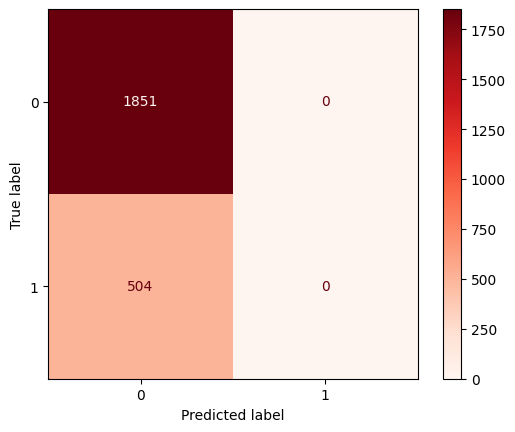

In [ ]:
# Model Evaluasi SVC
print('Evaluation: SVC train set ')
print(classification_report(y_train, y_pred_train_svc))
print('#'*60)
print('Evaluation: SVC test set')
print(classification_report(y_test, y_pred_test_svc))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation SVC
Recall_score_train_cross_val_svc = cross_val_score(svc, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='precision')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_svc)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_svc.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_svc.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_svc.mean()-Recall_score_train_cross_val_svc.std()) , '-', (Recall_score_train_cross_val_svc.mean()+Recall_score_train_cross_val_svc.std()))

Recall Score - All - Cross Validation  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall Score - Mean - Cross Validation :  0.0
Recall Score - Std - Cross Validation  :  0.0
Recall Score - Range of Test-Set       :  0.0 - 0.0


In [ ]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_svc.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_svc.std()
}
Report_Recall['SVC'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC
Recall Score - Mean - Cross Validation,0.0,0.0
Recall Score - Std - Cross Validation,0.0,0.0


## Decision Tree

In [ ]:
# Predik dengan Decision Tree
y_pred_train_dct= dct.predict(X_train_new)
y_pred_test_dct = dct.predict(X_test_new)

Evaluation: Decision Tree train set 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1851
           1       1.00      1.00      1.00       504

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355

############################################################
Evaluation: Decision Tree test set
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       463
           1       0.39      0.40      0.40       126

    accuracy                           0.74       589
   macro avg       0.61      0.62      0.61       589
weighted avg       0.74      0.74      0.74       589

Confusion Matrix      : 


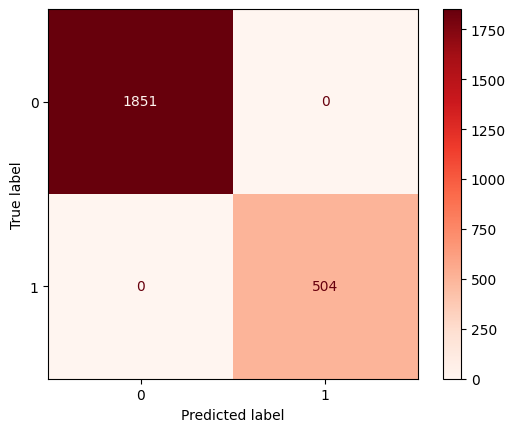

In [ ]:
# Model Evaluasi Decision Tree
print('Evaluation: Decision Tree train set ')
print(classification_report(y_train, y_pred_train_dct))
print('#'*60)
print('Evaluation: Decision Tree test set')
print(classification_report(y_test, y_pred_test_dct))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dct, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation Decision Tree
Recall_score_train_cross_val_dct = cross_val_score(dct, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_dct)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_dct.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_dct.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_dct.mean()-Recall_score_train_cross_val_dct.std()) , '-', (Recall_score_train_cross_val_dct.mean()+Recall_score_train_cross_val_dct.std()))

Recall Score - All - Cross Validation  :  [0.45098039 0.47058824 0.35294118 0.43137255 0.38       0.36
 0.46       0.38       0.4        0.36      ]
Recall Score - Mean - Cross Validation :  0.40458823529411764
Recall Score - Std - Cross Validation  :  0.042626224345141545
Recall Score - Range of Test-Set       :  0.36196201094897607 - 0.4472144596392592


In [ ]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_dct.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_dct.std()
}
Report_Recall['Decision Tree'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree
Recall Score - Mean - Cross Validation,0.0,0.0,0.404588
Recall Score - Std - Cross Validation,0.0,0.0,0.042626


## Random Forest

In [ ]:
# Predik dengan random Forest
y_pred_train_rdf= rdf.predict(X_train_new)
y_pred_test_rdf = rdf.predict(X_test_new)

Evaluation: Random Forest train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1851
           1       1.00      1.00      1.00       504

    accuracy                           1.00      2355
   macro avg       1.00      1.00      1.00      2355
weighted avg       1.00      1.00      1.00      2355

############################################################
Evaluation: Random Forest test set
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       463
           1       0.71      0.40      0.51       126

    accuracy                           0.84       589
   macro avg       0.78      0.68      0.71       589
weighted avg       0.82      0.84      0.82       589

Confusion Matrix      : 


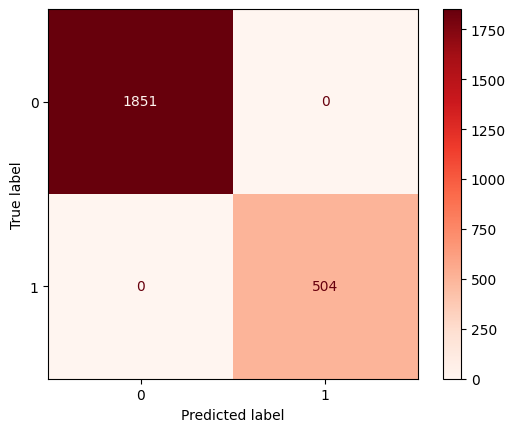

In [ ]:
# Model Evaluasi Random Forest
print('Evaluation: Random Forest train set')
print(classification_report(y_train, y_pred_train_rdf))
print('#'*60)
print('Evaluation: Random Forest test set')
print(classification_report(y_test, y_pred_test_rdf))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rdf, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation Random Forest
Recall_score_train_cross_val_rdf = cross_val_score(rdf, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_rdf)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_rdf.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_rdf.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_rdf.mean()-Recall_score_train_cross_val_rdf.std()) , '-', (Recall_score_train_cross_val_rdf.mean()+Recall_score_train_cross_val_rdf.std()))

Recall Score - All - Cross Validation  :  [0.45098039 0.35294118 0.33333333 0.47058824 0.34       0.3
 0.48       0.28       0.26       0.44      ]
Recall Score - Mean - Cross Validation :  0.37078431372549014
Recall Score - Std - Cross Validation  :  0.07829758196644145
Recall Score - Range of Test-Set       :  0.2924867317590487 - 0.4490818956919316


In [ ]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_rdf.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_rdf.std()
}
Report_Recall['Random Forest'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree,Random Forest
Recall Score - Mean - Cross Validation,0.0,0.0,0.404588,0.370784
Recall Score - Std - Cross Validation,0.0,0.0,0.042626,0.078298


## KNN


In [ ]:
# Predik dengan KNN
y_pred_train_knn= knn.predict(X_train_new)
y_pred_test_knn = knn.predict(X_test_new)

Evaluation: KNN train set
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1851
           1       0.73      0.31      0.44       504

    accuracy                           0.83      2355
   macro avg       0.78      0.64      0.67      2355
weighted avg       0.81      0.83      0.80      2355

############################################################
Evaluation: KNN test set
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       463
           1       0.61      0.21      0.32       126

    accuracy                           0.80       589
   macro avg       0.72      0.59      0.60       589
weighted avg       0.77      0.80      0.76       589

Confusion Matrix      : 


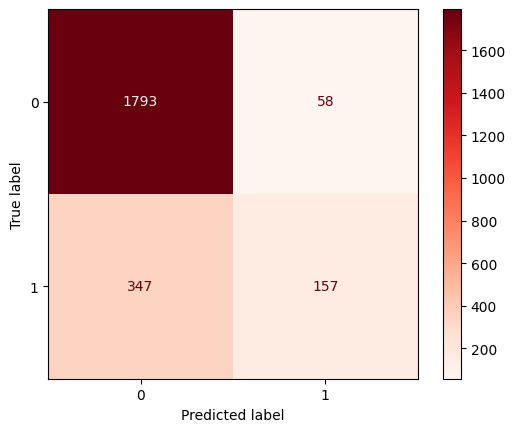

In [ ]:
# Model Evaluasi KNN
print('Evaluation: KNN train set')
print(classification_report(y_train, y_pred_train_knn))
print('#'*60)
print('Evaluation: KNN test set')
print(classification_report(y_test, y_pred_test_knn))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation KNN
Recall_score_train_cross_val_knn = cross_val_score(knn, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_knn)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_knn.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_knn.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_knn.mean()-Recall_score_train_cross_val_knn.std()) , '-', (Recall_score_train_cross_val_knn.mean()+Recall_score_train_cross_val_knn.std()))

Recall Score - All - Cross Validation  :  [0.19607843 0.2745098  0.15686275 0.17647059 0.22       0.16
 0.26       0.2        0.2        0.14      ]
Recall Score - Mean - Cross Validation :  0.19839215686274508
Recall Score - Std - Cross Validation  :  0.041419432593723514
Recall Score - Range of Test-Set       :  0.15697272426902156 - 0.2398115894564686


In [ ]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_knn.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_knn.std()
}
Report_Recall['KNN'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree,Random Forest,KNN
Recall Score - Mean - Cross Validation,0.0,0.0,0.404588,0.370784,0.198392
Recall Score - Std - Cross Validation,0.0,0.0,0.042626,0.078298,0.041419


## Naive Bayes

In [ ]:
# Predik dengan Naive Buyes
y_pred_train_nb = nb.predict(X_train_new)
y_pred_test_nb = nb.predict(X_test_new)

Evaluation: Naive Buyes train set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1851
           1       0.00      0.00      0.00       504

    accuracy                           0.79      2355
   macro avg       0.39      0.50      0.44      2355
weighted avg       0.62      0.79      0.69      2355

############################################################
Evaluation: Naive Buyes test set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       463
           1       0.00      0.00      0.00       126

    accuracy                           0.79       589
   macro avg       0.39      0.50      0.44       589
weighted avg       0.62      0.79      0.69       589

Confusion Matrix      : 


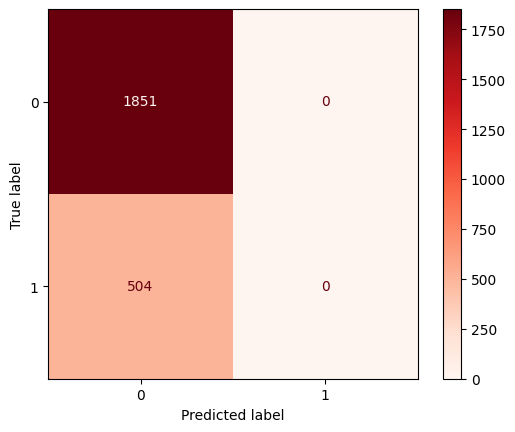

In [ ]:
# Model Evaluasi Naive Bayes
print('Evaluation: Naive Buyes train set')
print(classification_report(y_train, y_pred_train_nb))
print('#'*60)
print('Evaluation: Naive Buyes test set')
print(classification_report(y_test, y_pred_test_nb))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(nb, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation Naive Buyes
Recall_score_train_cross_val_nb = cross_val_score(nb, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_nb)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_nb.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_nb.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_nb.mean()-Recall_score_train_cross_val_nb.std()) , '-', (Recall_score_train_cross_val_nb.mean()+Recall_score_train_cross_val_nb.std()))

Recall Score - All - Cross Validation  :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall Score - Mean - Cross Validation :  0.0
Recall Score - Std - Cross Validation  :  0.0
Recall Score - Range of Test-Set       :  0.0 - 0.0


In [ ]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_nb.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_nb.std()
}
Report_Recall['Naive Bayes'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree,Random Forest,KNN,Naive Bayes
Recall Score - Mean - Cross Validation,0.0,0.0,0.404588,0.370784,0.198392,0.0
Recall Score - Std - Cross Validation,0.0,0.0,0.042626,0.078298,0.041419,0.0


## Neural Networks (Multi-layer Perceptron)

In [ ]:
# Predik dengan MLPClassifier
y_pred_train_mlpc = mlpc.predict(X_train_new)
y_pred_test_mlpc = mlpc.predict(X_test_new)

Evaluation: MLPClassifier train set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1851
           1       0.00      0.00      0.00       504

    accuracy                           0.79      2355
   macro avg       0.39      0.50      0.44      2355
weighted avg       0.62      0.79      0.69      2355

############################################################
Evaluation: MLPClassifier test set
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       463
           1       0.00      0.00      0.00       126

    accuracy                           0.79       589
   macro avg       0.39      0.50      0.44       589
weighted avg       0.62      0.79      0.69       589

Confusion Matrix      : 


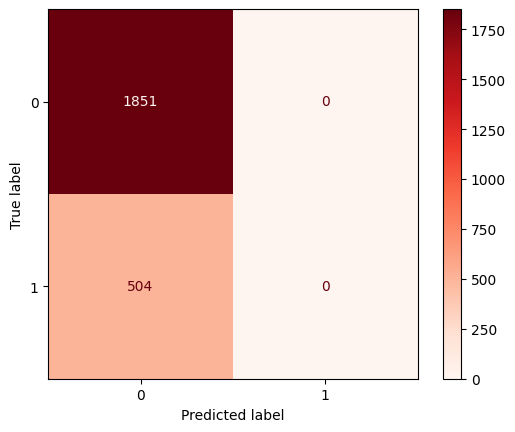

In [ ]:
# Model Evaluasi MLPClassifier
print('Evaluation: MLPClassifier train set')
print(classification_report(y_train, y_pred_train_mlpc))
print('#'*60)
print('Evaluation: MLPClassifier test set')
print(classification_report(y_test, y_pred_test_mlpc))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(mlpc, X_train_new, y_train, cmap='Reds'))

In [ ]:
# Cross Validation MLPClassifier
Recall_score_train_cross_val_mlpc = cross_val_score(mlpc, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_mlpc)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_mlpc.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_mlpc.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_mlpc.mean()-Recall_score_train_cross_val_mlpc.std()) , '-', (Recall_score_train_cross_val_mlpc.mean()+Recall_score_train_cross_val_mlpc.std()))

Recall Score - All - Cross Validation  :  [0.         0.         0.         0.09803922 0.         0.
 0.         0.         0.         0.        ]
Recall Score - Mean - Cross Validation :  0.00980392156862745
Recall Score - Std - Cross Validation  :  0.02941176470588235
Recall Score - Range of Test-Set       :  -0.019607843137254898 - 0.0392156862745098


### All report

In [ ]:
score = {
    'Recall Score - Mean - Cross Validation' : Recall_score_train_cross_val_mlpc.mean(),
    'Recall Score - Std - Cross Validation' : Recall_score_train_cross_val_mlpc.std()
}
Report_Recall['MLPClassifier'] = score
pd.DataFrame(Report_Recall)

,Logistic Regresion,SVC,Decision Tree,Random Forest,KNN,Naive Bayes,MLPClassifier
Recall Score - Mean - Cross Validation,0.0,0.0,0.404588,0.370784,0.198392,0.0,0.009804
Recall Score - Std - Cross Validation,0.0,0.0,0.042626,0.078298,0.041419,0.0,0.029412


Dari hasil Crosvalidation berdasarkan matriks recall didapatkan model yang hasilnya paling baik adalah Decision Tree, dan yang akan di Hyperparameter Tuning. Penggunaan metriks recall sebagai scoring karena ingin meminimalisir False Negatifnya, dimana di prediksi akan tetap bayar ternyata tidak lanjut bayar

## Hyperparameter Tuning Decision Tree

In [ ]:
all_reports = {}
score_reports = {
    'Train - precision' : precision_score(y_train, y_pred_train_dct),
    'Test - precision' : precision_score(y_test, y_pred_test_dct),
    'Train - recall' : recall_score(y_train, y_pred_train_dct),
    'Test - recall' : recall_score(y_test, y_pred_test_dct),
    'Train - accuracy' : accuracy_score(y_train, y_pred_train_dct),
    'Test - accuracy' : accuracy_score(y_test, y_pred_test_dct),
    'Train - f1_score' : f1_score(y_train, y_pred_train_dct),
    'Test - f1_score' : f1_score(y_test, y_pred_test_dct),
}
all_reports['Baseline (Default Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
Test - accuracy,0.740238
Test - f1_score,0.395257
Test - precision,0.393701
Test - recall,0.396825
Train - accuracy,1.000000
Train - f1_score,1.000000
Train - precision,1.000000
Train - recall,1.000000


In [ ]:
# Mendifine Hyper parameter
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 100, 10)]
min_samples_split = [2, 5, 10, 50]
min_samples_leaf = [1, 2, 4, 10, 40]
splitter = ['best', 'random']
class_weight = ['balanced']

hyperparameter = {'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':criterion,
               'splitter':splitter,
               'class_weight': class_weight
}


In [ ]:
dct_hypt = GridSearchCV(estimator=DecisionTreeClassifier(),
                        param_grid=hyperparameter,
                        n_jobs=-1,
                        verbose=2,
                        scoring='recall')

In [ ]:
# Fit denggan hyper parameter yang baru 
dct_hypt.fit(X_train_new, y_train)

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 12, 23, 34, 45, 56, 67, 78, 89, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 10, 40],
                         'min_samples_split': [2, 5, 10, 50],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=2)

In [ ]:
dct_hypt.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
# Preditc dengea Hyper parameter yang baru
y_pred_train_dct_hypt = dct_hypt.predict(X_train_new)
y_pred_test_dct_hypt = dct_hypt.predict(X_test_new)

Evaluation: MLPClassifier train set
              precision    recall  f1-score   support

           0       0.85      0.58      0.69      1851
           1       0.29      0.63      0.40       504

    accuracy                           0.59      2355
   macro avg       0.57      0.60      0.54      2355
weighted avg       0.73      0.59      0.63      2355

############################################################
Evaluation: MLPClassifier test set
              precision    recall  f1-score   support

           0       0.83      0.56      0.67       463
           1       0.26      0.58      0.36       126

    accuracy                           0.56       589
   macro avg       0.55      0.57      0.52       589
weighted avg       0.71      0.56      0.60       589

Confusion Matrix      : 


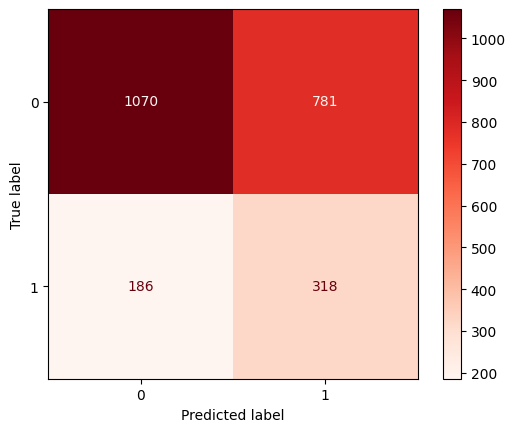

In [ ]:
# Model Evaluasi MLPClassifier
print('Evaluation: MLPClassifier train set')
print(classification_report(y_train, y_pred_train_dct_hypt))
print('#'*60)
print('Evaluation: MLPClassifier test set')
print(classification_report(y_test, y_pred_test_dct_hypt))
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dct_hypt, X_train_new, y_train, cmap='Reds'))

In [ ]:
score_reports = {
    'Train - precision' : precision_score(y_train, y_pred_train_dct_hypt),
    'Test - precision' : precision_score(y_test, y_pred_test_dct_hypt),
    'Train - recall' : recall_score(y_train, y_pred_train_dct_hypt),
    'Test - recall' : recall_score(y_test, y_pred_test_dct_hypt),
    'Train - accuracy' : accuracy_score(y_train, y_pred_train_dct_hypt),
    'Test - accuracy' : accuracy_score(y_test, y_pred_test_dct_hypt),
    'Train - f1_score' : f1_score(y_train, y_pred_train_dct_hypt),
    'Test - f1_score' : f1_score(y_test, y_pred_test_dct_hypt),
}
all_reports['After Hyperparameter)'] = score_reports
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),After Hyperparameter)
Train - precision,1.000000,0.289354
Test - precision,0.393701,0.263538
Train - recall,1.000000,0.630952
Test - recall,0.396825,0.579365
Train - accuracy,1.000000,0.589384
Test - accuracy,0.740238,0.563667
Train - f1_score,1.000000,0.396756
Test - f1_score,0.395257,0.362283


Dari hasil didapatkan setelah di hyperparameter tuning menjadi lebih baik, pada kondisi defaut sebelum hyperparameter model overfit dengan selisih yang sangat jauh antara train set dan test setnya , tetapi setelah di hyperparameter tuning performa model jauh menjadi lebih baik walaupun masih tetap overfit namun seleisih antara train set dan test setnya lebih dekat

In [ ]:
# Cross Validation dct_hyptlassifier
Recall_score_train_cross_val_dct_hypt = cross_val_score(dct_hypt, 
                                           X_train_new, 
                                           y_train, 
                                           cv=10, 
                                           scoring='recall')

print('Recall Score - All - Cross Validation  : ', Recall_score_train_cross_val_dct_hypt)
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_dct_hypt.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_dct_hypt.std())
print('Recall Score - Range of Test-Set       : ', (Recall_score_train_cross_val_dct_hypt.mean()-Recall_score_train_cross_val_dct_hypt.std()) , '-', (Recall_score_train_cross_val_dct_hypt.mean()+Recall_score_train_cross_val_dct_hypt.std()))

Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits
Recall Score - All - Cross Validation  :  [0.29411765 0.29411765 0.03921569 0.01960784 0.98       1.
 0.86       0.28       0.7        0.06      ]
Recall Score - Mean - Cross Validation :  0.4527058823529411
Recall Score - Std - Cross Validation  :  0.37383239011832065
Recall Score - Range of Test-Set       :  0.07887349223462048 - 0.8265

In [ ]:
# Hasil Recal score setelah di hyperparameter tuning
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_dct_hypt.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_dct_hypt.std())

Recall Score - Mean - Cross Validation :  0.4527058823529411
Recall Score - Std - Cross Validation  :  0.37383239011832065


In [ ]:
# Perbandingan Recal score 

print('Hasil Recal score sebelum di hyperparameter tuning')
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_dct.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_dct.std())
print()
print('#'*80)
print()
print('Hasil Recal score setelah di hyperparameter tuning')
print('Recall Score - Mean - Cross Validation : ', Recall_score_train_cross_val_dct_hypt.mean())
print('Recall Score - Std - Cross Validation  : ', Recall_score_train_cross_val_dct_hypt.std())


Hasil Recal score sebelum di hyperparameter tuning
Recall Score - Mean - Cross Validation :  0.40458823529411764
Recall Score - Std - Cross Validation  :  0.042626224345141545

################################################################################

Hasil Recal score setelah di hyperparameter tuning
Recall Score - Mean - Cross Validation :  0.4527058823529411
Recall Score - Std - Cross Validation  :  0.37383239011832065


# **x. Model Saving**

In [ ]:
with open('dct_hypt.pkl', 'wb') as file_1:
  pickle.dump(dct_hypt, file_1)

with open('preproses.pkl', 'wb') as file_2:
  pickle.dump(preproses, file_2)

# **xi. Model Inference**

In [ ]:
#Dalam notebook yang berberda

# **xii. Conclusion**

Dari hasil percobaan beberapa model, model yang performa lebih baik diantara model yang lain adalah decision tree tetapi hasilnya masih kurang baik dan masih underfit dan overvit, setelah dilakukan hyperparameter tuning performanya meningkat sedikit dari sebelumnya namun tetap kurang maksimal dan masih overfit. Hal dapat disebabkan juga karena data target yang imbalance , dan juga pemilihan fitur yang kurang tepat. Untuk modelnya agar performancenya lebih baik sebaiknya dapat dilakukan penanganan data imbalance, pemilihan fitur yang lebih tepat, dan juga tuning hyperparameter yang lebih maksimal seperti nilai max_depth, min_samples_split, min_samples_leaf lebih dimaksimalkan lagi untuk mencari nilai yang paling tepat 

Untuk konteks bisnis dari hasil analisa EDA, hasil default payment berpengaruh besar terhadap limit balance, pelanggan dengan limit balance yang besar memiliki kemungkinan yang kecil untuk default payment, dan sebaliknya, yang limit balancenya lebih kecil memiki kemungkinan default payent lebih besar kedepannya. Dari hasil analisa juga ditemukan bahwa yang mempunyai kartu credit itu adalah lebih dominan perempuan. Saran bisnis agar lebih meningkat, sebaiknya untuk pelanggan yang limit balancenya lebih kecil dikasih berupa promo atau diskon agar mereka tertarik 

## Conceptual Problems

1. Apa yang dimaksud dengan `criterion` pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini !

Criterion pada decision tree adalah metode yang digunakan untuk mengukur kualitas pemisahan atau pemilihan fitur terbaik pada setiap node dalam pohon keputusan. criterion digunakan untuk menghitung impurity atau ketidakmurnian dari set data pada setiap node.

2. Jelaskan apa yang dimaksud dengan `pruning` pada Tree-based model (alasan, definisi, jenis, dll) !

- Pruning adalah proses menghapus cabang-cabang atau simpul-simpul yang tidak memberikan manfaat yang signifikan dalam meningkatkan kemampuan generalisasi model, dengan tujuan untuk meningkatkan kinerja model pada data baru yang belum pernah dilihat sebelumnya. 
- Tujuan Pruning: 
1. Mengurangi overfitting: Pohon keputusan yang tidak dipangkas cenderung memiliki kecenderungan untuk "menghafal" data pelatihan dan kinerjanya dapat menurun saat digunakan untuk memprediksi data baru yang tidak terlihat sebelumnya. Pruning membantu menghindari overfitting dan meningkatkan generalisasi model.
2. Mengurangi kompleksitas model: Pohon keputusan yang tidak dipangkas dapat memiliki banyak simpul dan cabang, membuatnya sulit diinterpretasikan dan meningkatkan waktu komputasi. Pruning membantu menyederhanakan model dengan menghapus simpul dan cabang yang tidak penting.

- Jenis Pruning:
1. Pre-Pruning (Eager Pruning): Pruning dilakukan selama atau sebelum proses pembangunan pohon keputusan. Ini dilakukan dengan membatasi pertumbuhan pohon berdasarkan kondisi pra-ditetapkan, seperti kedalaman maksimum pohon, jumlah minimum sampel pada simpul, atau kriteria berhenti lainnya.
2. Post-Pruning (Lazy Pruning): Pruning dilakukan setelah pohon keputusan selesai dibangun secara lengkap. Ini melibatkan pengujian setiap simpul pada pohon dan menghapus cabang-cabang yang memberikan peningkatan kinerja yang tidak signifikan. Pruning dilakukan dengan menggunakan teknik seperti Reduced Error Pruning (REP), Cost Complexity Pruning (CCP), atau Validasi Silang (Cross-Validation Pruning).

3. Bagaimana cara memilih `K` yang optimal pada KNN ?

Dapat ditentukan dengan menggunakan rute of thumb, yaitu hasil akar dari jumlah sample atau data, dan gunakan angka yang ganjil untuk menghindari voting yang seri

4. Jelaskan apa yang dimaksud dengan `Cross Validation` !


Cross-validation adalah sebuah metode yang digunakan untuk mengevaluasi kinerja model statistik atau machine learning pada dataset terbatas. Tujuan utama dari cross-validation adalah untuk mengukur sejauh mana model yang dibangun dapat digeneralisasi ke data yang belum pernah dilihat sebelumnya

5. Apa yang dimaksud dengan metrics-metrics berikut : `Accuracy`, `Precision`, `Recall`, `F1 Score`, dan kapan waktu yang tepat untuk menggunakannya ?

- Accuracy (Akurasi):
Accuracy mengukur sejauh mana model dapat mengklasifikasikan data dengan benar.
Digunakan ketika: Data target memiliki kelas yang seimbang atau setara, dan kesalahan false positive dan false negative memiliki konsekuensi yang relatif sama.

- Precision (Presisi):
Precision mengukur sejauh mana hasil positif yang diprediksi oleh model adalah benar.
Digunakan ketika: Fokus pada mengurangi kesalahan false positive.

- Recall (Recall atau Sensitivitas):
Recall mengukur sejauh mana model dapat mengklasifikasikan benar semua instance yang sebenarnya positif.
Digunakan ketika: Fokus pada mengurangi kesalahan false negative.

- F1 Score:
F1 Score merupakan harmonic mean (rata-rata harmonis) dari precision dan recall.
Digunakan ketika: Keseimbangan antara precision dan recall diperlukan. Berguna ketika terdapat ketidakseimbangan kelas dalam data target.